In [30]:
from src.utils import get_matches

import datasets
from collections import Counter
import geopandas as gpd
import country_converter as coco
import matplotlib.pyplot as plt
import numpy as np
from math import log10
import seaborn as sns
sns.set_style('whitegrid')


In [2]:
# load matches
dataset = datasets.load_dataset("FAERS-PubMed/raw_dataset")
matches = get_matches(dataset['train'])
print(len(matches))

Using custom data configuration FAERS-PubMed--raw_dataset-0b83cc0b498dbbb2
Found cached dataset json (/Users/kldooste/.cache/huggingface/datasets/FAERS-PubMed___json/FAERS-PubMed--raw_dataset-0b83cc0b498dbbb2/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)
100%|██████████| 1/1 [00:00<00:00, 50.54it/s]


65648


## Simple statistics

In [6]:
print(f'Number of unique articles: {len(matches):,}')
print(f'Number of unique articles with an abstract: {len([m for m in matches if m.article.abstract]):,}')
print(f'Number of unique articles with a full-text: {len([m for m in matches if m.article.fulltext]):,}')
print()
print(f'Number of unique reports: {sum([len(m.reports) for m in matches]):,}')

Number of unique articles: 65,648
Number of unique articles with an abstract: 65,648
Number of unique articles with a full-text: 19,433

Number of unique reports: 256,240


In [7]:
abstract_length = np.array([len(m.article.abstract) for m in matches])
print(f'Average abstract length: {round(abstract_length.mean()):,}')
fulltext_length = np.array([len(m.article.fulltext) for m in matches if m.article.fulltext])
print(f'Average fulltext length: {round(fulltext_length.mean()):,}')

Average abstract length: 1,277
Average fulltext length: 23,767


## Licenses

In [5]:
# noncommercial_licenses = {'CC BY-NC', 'CC BY-NC-SA', 'CC BY-NC-ND'}
commercial_licenses = {'CC0', 'CC BY', 'CC BY-SA', 'CC BY-ND'}

matches_commercial = [m for m in matches if m.article.fulltext_license in commercial_licenses]
print(f'Fulltext commercial dataset: {len(matches_commercial):,}')

Fulltext commercial dataset: 9,206


## Study the origin of the articles and reports

In [21]:
def normalize_countries(countries):
    countries = [c for c in countries if c or c != 'None' or c != 'COUNTRY NOT SPECIFIED']
    countries_norm = []
    for c in countries:
        if c == 'England' or c == 'Scotland':
            countries_norm.append('United Kingdom')
        else:
            countries_norm.append(c)
    countries_iso3 = coco.convert(names=countries_norm, to='ISO3', not_found='NULL')
    return countries_iso3

def plot_world_heatmap(countries, title='', log=True):
    world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world_map = world_map.drop(world_map[world_map['name'] == 'Antarctica'].index)

    # countries_iso3 = normalize_countries(countries)
    counts = Counter(countries)

    world_map['occurances'] = world_map['iso_a3'].apply(lambda x: counts[x])
    world_map['occurances_log'] = world_map['occurances'].apply(lambda x: log10(x) if x else 0)

    if log:
        plot = world_map.plot(figsize=(20, 20), edgecolor='white', linewidth=1, column='occurances_log', cmap='viridis', legend=False)
    else:
        plot = world_map.plot(figsize=(20, 20), edgecolor='white', linewidth=1, column='occurances', cmap='viridis', legend=False)

    # remove axes
    plot.set_axis_off()

    # add legend
    cbar = plt.colorbar(plot.collections[0], fraction=0.015)
    cbar.ax.set_ylabel('Log Occurrences' if log else 'Occurrences')
    cbar.ax.get_yaxis().labelpad = 20

    plt.title(title)
    plt.show()

def plot_world_heatmap_ax(ax, countries, log=True, title=''):
    world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world_map = world_map.drop(world_map[world_map['name'] == 'Antarctica'].index)

    # countries_iso3 = normalize_countries(countries)
    counts = Counter(countries)

    world_map['occurances'] = world_map['iso_a3'].apply(lambda x: counts[x])
    world_map['occurances_log'] = world_map['occurances'].apply(lambda x: log10(x) if x else 0)

    if log:
        plot = world_map.plot(ax=ax, figsize=(6, 6), edgecolor='white', linewidth=1, column='occurances_log', cmap='viridis', legend=False)
    else:
        plot = world_map.plot(ax=ax, figsize=(6, 6), edgecolor='white', linewidth=1, column='occurances', cmap='viridis', legend=False)

    # remove axes
    plot.set_axis_off()

    # # add legend
    # cbar = plt.colorbar(plot.collections[0], ax=ax, fraction=0.02)
    # cbar.ax.set_ylabel('Log Occurrences' if log else 'Occurrences')
    # cbar.ax.get_yaxis().labelpad = 20

    # set title
    ax.set_title(title)

    return plot

In [15]:
report_occur = normalize_countries([r.occurcountry for m in matches for r in m.reports])
# article_countries = normalize_countries([m.article.country for m in matches])
# report_primarysource = normalize_countries([r.primarysourcecountry for m in matches for r in m.reports])
# report_reportercountry = normalize_countries([r.primarysource.reportercountry for m in matches for r in m.reports])


None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
A1 not found in ISO2
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in r

In [28]:
sorted(list(Counter(report_occur).items()), key=lambda x: x[1], reverse=True)

[('USA', 110438),
 ('JPN', 19750),
 ('ITA', 12359),
 ('DEU', 10564),
 ('FRA', 10163),
 ('GBR', 9800),
 ('CHN', 6642),
 ('ESP', 6499),
 ('TUR', 5782),
 ('IND', 5669),
 ('CAN', 5280),
 ('AUS', 5004),
 ('NLD', 4223),
 ('KOR', 3175),
 ('BRA', 2291),
 ('POL', 2222),
 ('PRT', 2192),
 ('DNK', 2154),
 ('CHE', 2058),
 ('TWN', 1998),
 ('BEL', 1854),
 ('SWE', 1574),
 ('ISR', 1488),
 ('GRC', 1326),
 ('IRN', 1281),
 ('AUT', 1110),
 ('SAU', 1071),
 ('ZAF', 1016),
 ('FIN', 937),
 ('THA', 901),
 ('NOR', 828),
 ('IRL', 811),
 ('EGY', 768),
 ('SGP', 665),
 ('NULL', 656),
 ('MEX', 641),
 ('CZE', 639),
 ('NZL', 587),
 ('ROU', 473),
 ('RUS', 465),
 ('BWA', 462),
 ('HKG', 454),
 ('ARG', 445),
 ('MYS', 415),
 ('TUN', 401),
 ('HRV', 398),
 ('HUN', 352),
 ('PAK', 343),
 ('SVN', 294),
 ('COL', 293),
 ('CHL', 259),
 ('SRB', 253),
 ('QAT', 237),
 ('LBN', 224),
 ('MAR', 209),
 ('UGA', 199),
 ('IDN', 176),
 ('LKA', 164),
 ('NGA', 161),
 ('ARE', 150),
 ('JOR', 143),
 ('SVK', 132),
 ('NPL', 131),
 ('KEN', 126),
 ('TZ

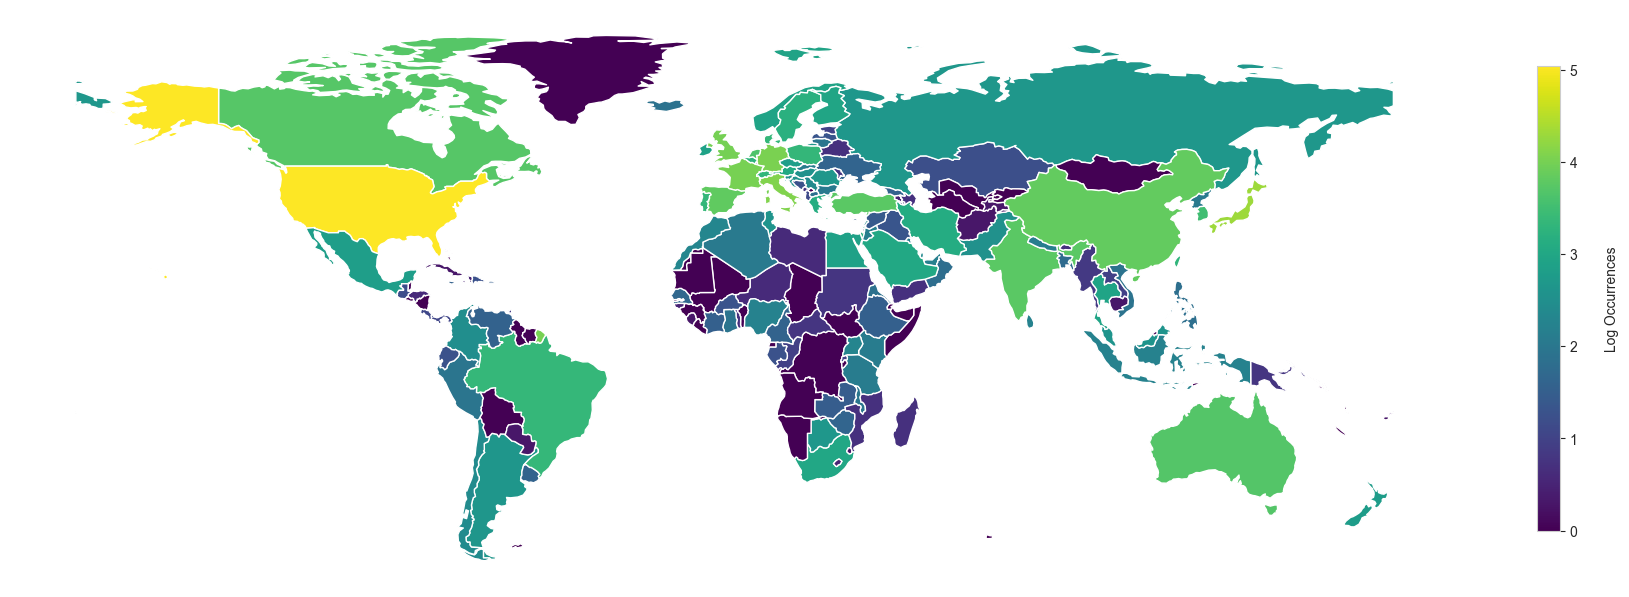

In [31]:
plot_world_heatmap(report_occur, None)


None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
A1 not found in ISO2
None not found in r

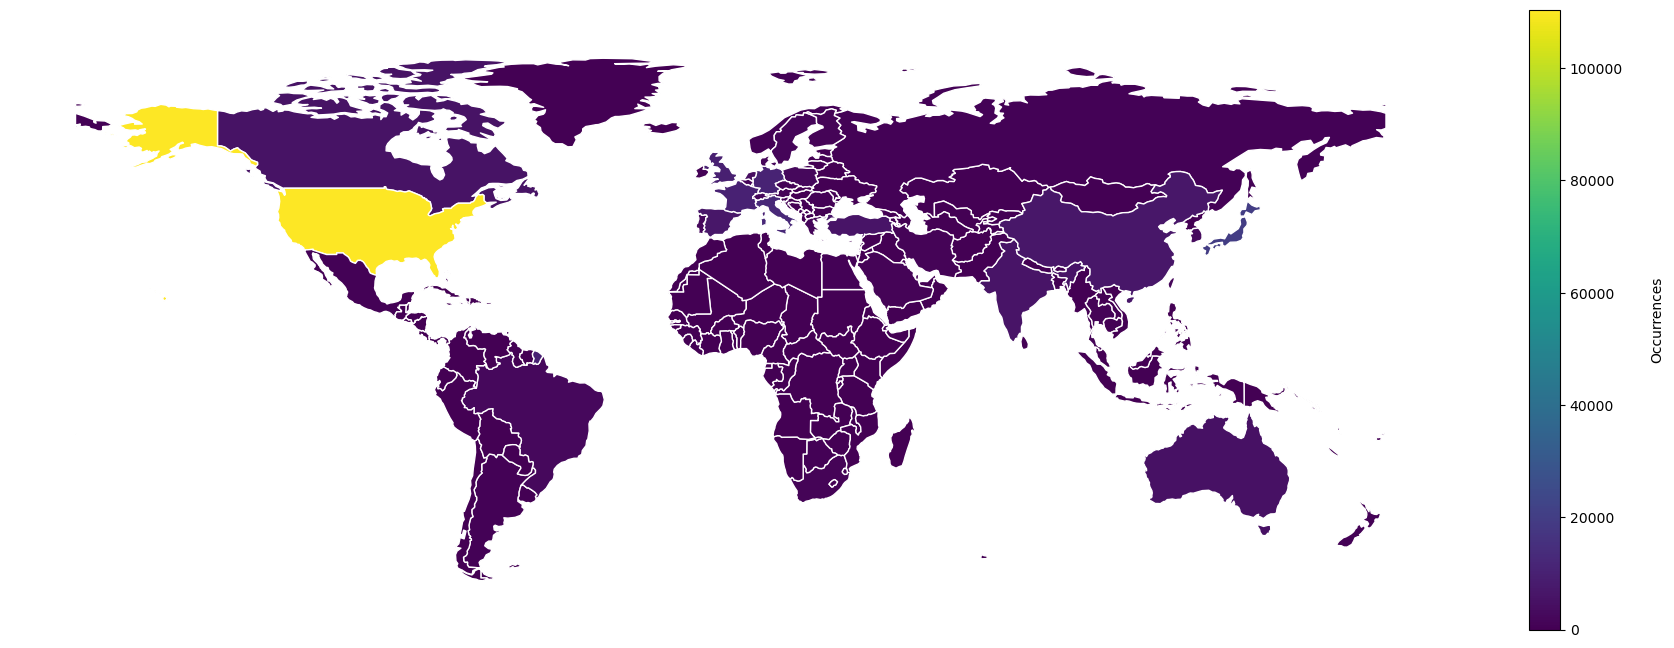

In [ ]:
plot_world_heatmap(report_occur, 'Occurcountry of report', log=False)


None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
A1 not found in ISO2
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in r

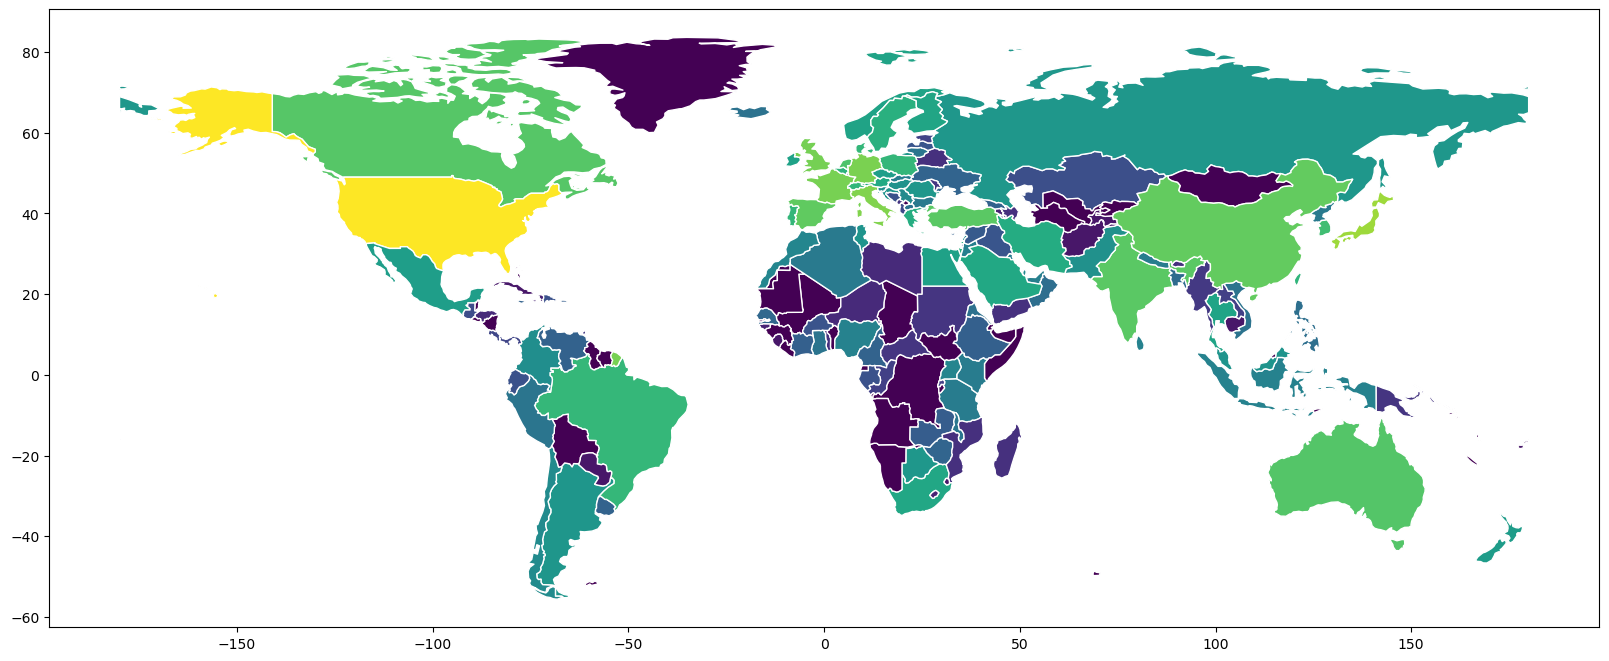

In [ ]:
plot_world_heatmap(article_countries, 'Country of article')

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
A1 not found in ISO2
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in r

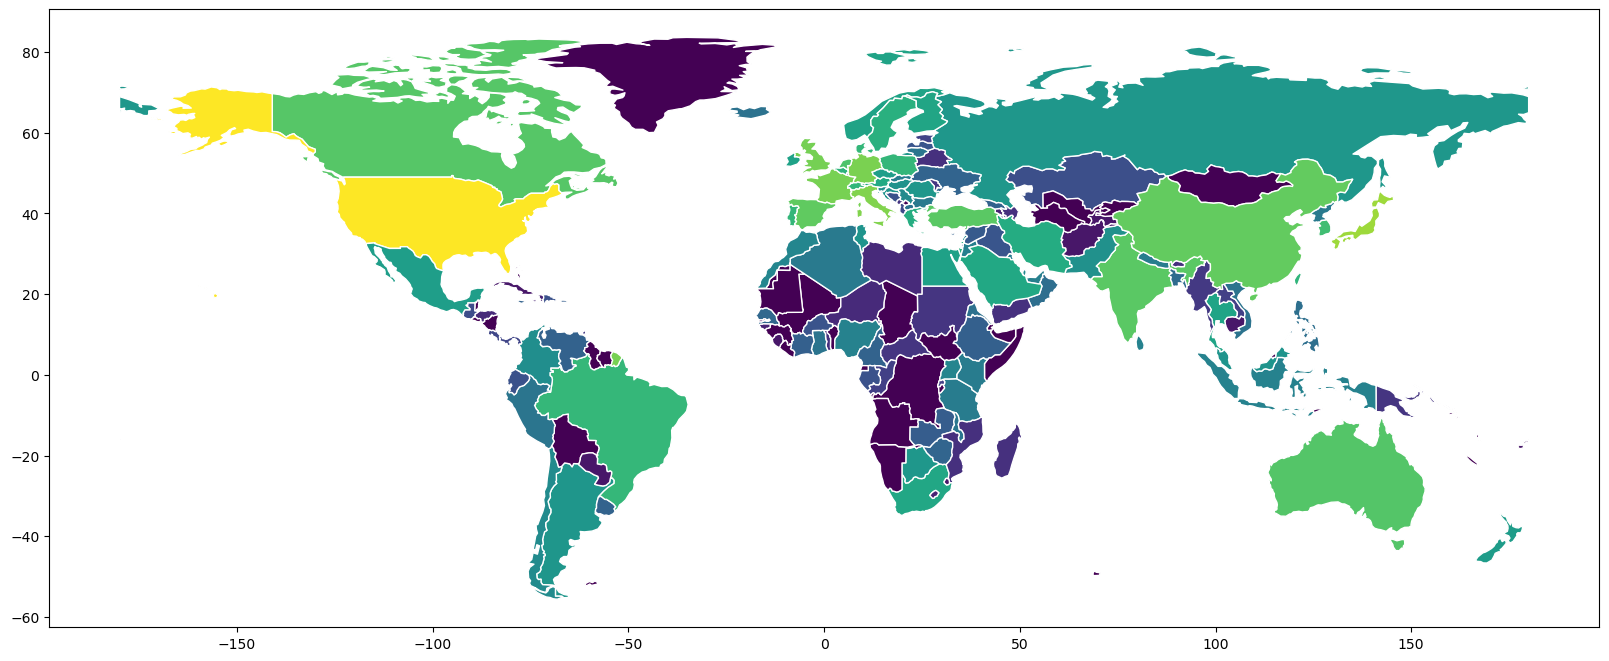

In [ ]:

plot_world_heatmap(report_primarysource,  'Country of report source')

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
A1 not found in ISO2
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in r

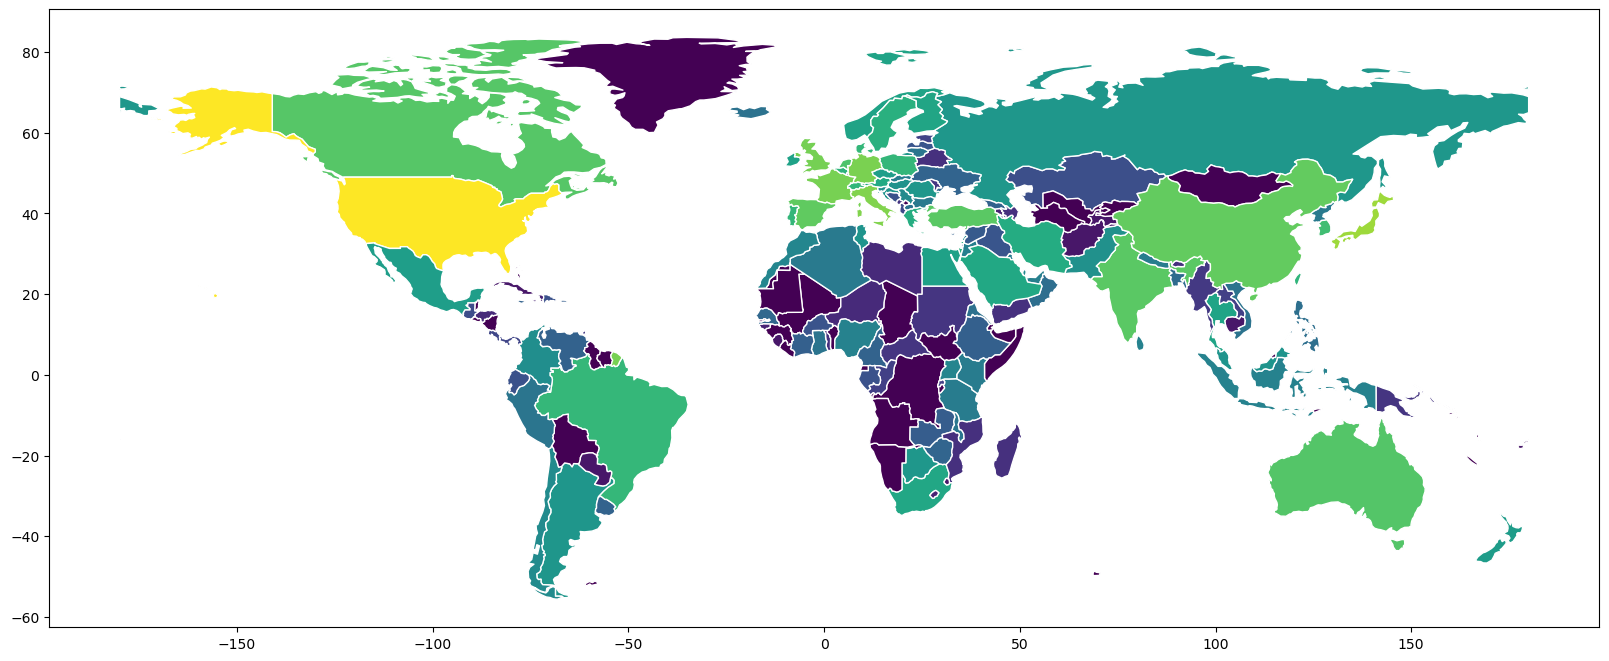

In [ ]:

plot_world_heatmap(report_reportercountry, 'Reporter country')

## Study dates

In [32]:
from datetime import datetime

article_dates = [m.article.pubdate for m in matches]

report_receive = [r.receivedate for m in matches for r in m.reports]
report_receipt = [r.receiptdate for m in matches for r in m.reports]
report_transmisstion = [r.transmissiondate for m in matches for r in m.reports]

# check how many have the full info
def check_info(s):
    if '-' in s:
        return len(s) == 10
    else:
        return len(s) == 8

# only articles have this problem
print(f'{sum([check_info(s) for s in article_dates])} / {len(article_dates)}')
print(f'{sum([check_info(s) for s in report_receive])} / {len(report_receive)}')
print(f'{sum([check_info(s) for s in report_receipt])} / {len(report_receipt)}')
print(f'{sum([check_info(s) for s in report_transmisstion])} / {len(report_transmisstion)}')

def parse_time_report(ls):
    return [datetime.strptime(s, '%Y%m%d') for s in ls]

def parse_time_article(ls):
    return [datetime.strptime(s[:4], '%Y') for s in ls]

article_dates = parse_time_article(article_dates)
report_receive = parse_time_report(report_receive)
report_receipt = parse_time_report(report_receipt)
report_transmisstion = parse_time_report(report_transmisstion)


14670 / 65648
256240 / 256240
256240 / 256240
256240 / 256240


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from matplotlib.cm import get_cmap

def plot_dates_bar(dates, title, article=False):
    # Generate some sample datetimes
    if article:
        start_time = datetime(year=min(dates).year, month=1, day=1)
    else:
        start_time = datetime(year=2001, month=1, day=1)
    end_time = datetime(year=2024, month=1, day=1)


    # Define the bin width (1 month in this case)
    bin_width = relativedelta(years=1)

    # Create a list of year starts
    bin_starts = [datetime(start_time.year, 1, 1)]
    while (end_time - bin_starts[-1]).days > 0:
        bin_starts.append(bin_starts[-1] + bin_width)

    # Create the histogram using the bin edges and datetimes
    hist, bins = np.histogram(dates, bins=bin_starts)

    hist = hist.squeeze()
    hist = list(hist)
    bins = bins.squeeze()
    if article:
        bins = [datetime.strftime(b, '\'%y') for b in bins]
    else:
        bins = [datetime.strftime(b, '%Y') for b in bins]

    # Plot the histogram
    plt.figure(figsize=(10,8))
    plt.bar(bins[:-1], hist)
    plt.xticks(rotation=90)
    plt.xlabel('Time')
    plt.ylabel('Count')
    # plt.yscale('log')
    plt.title(title)
    plt.show()

def plot_dates_bar_stacked(dates1, dates2, label1, label2, title):
    # Generate some sample datetimes
    start_time = datetime(year=1968, month=1, day=1)
    end_time = datetime(year=2024, month=1, day=1)


    # Define the bin width (1 year in this case)
    bin_width = relativedelta(years=1)

    # Create a list of year starts
    bin_starts = [datetime(start_time.year, 1, 1)]
    while (end_time - bin_starts[-1]).days > 0:
        bin_starts.append(bin_starts[-1] + bin_width)

    # Create the histogram using the bin edges and datetimes
    hist1, bins1 = np.histogram(dates1, bins=bin_starts)
    hist2, bins2 = np.histogram(dates2, bins=bin_starts)

    hist1 = hist1.squeeze()
    hist1 = list(hist1)
    bins1 = bins1.squeeze()
    bins1 = [datetime.strftime(b, '\'%y') for b in bins1]

    hist2 = hist2.squeeze()
    hist2 = list(hist2)
    bins2 = bins2.squeeze()
    bins2 = [datetime.strftime(b, '\'%y') for b in bins2]

   # Get viridis color cycle
    cmap = get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, 3))

    # Plot the histogram
    plt.figure(figsize=(10,8))
    plt.bar(bins1[:-1], hist1, label=label1, color=colors[0])
    plt.bar(bins2[:-1], hist2, bottom=hist1, label=label2, color=colors[1])
            
    plt.legend()
    plt.xticks(rotation=90)
    plt.xlabel('Time')
    plt.ylabel('Count')
    # plt.yscale('log')
    plt.title(title)
    plt.show()

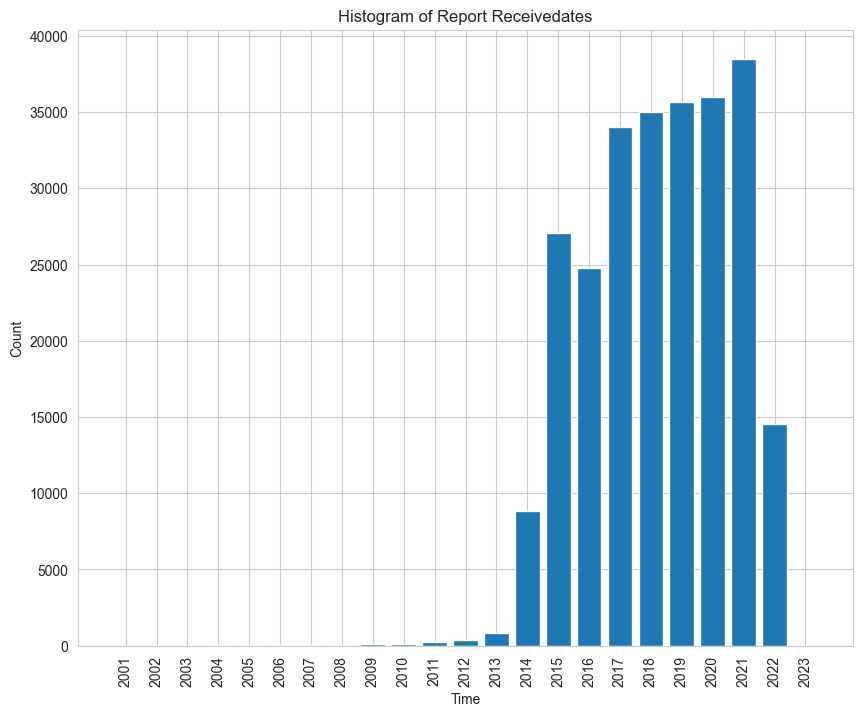

In [40]:
plot_dates_bar(report_receive, 'Histogram of Report Receivedates')


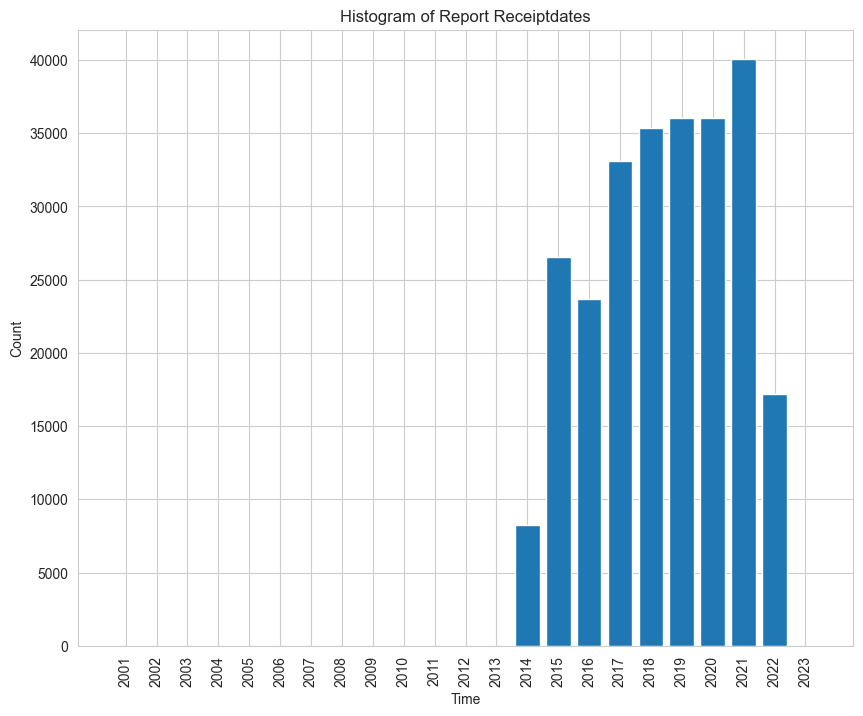

In [35]:
plot_dates_bar(report_receipt, 'Histogram of Report Receiptdates')


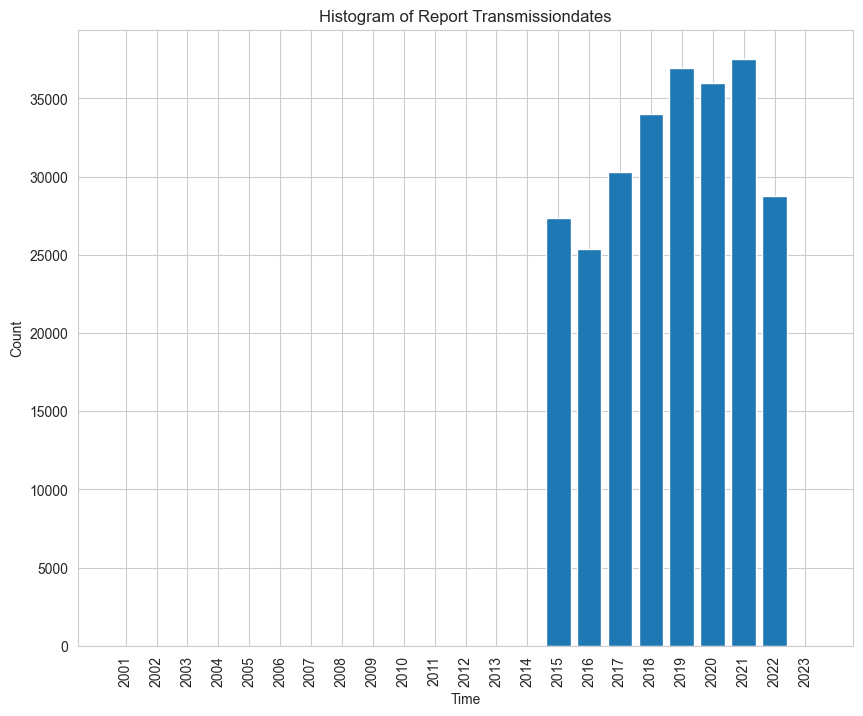

In [36]:
plot_dates_bar(report_transmisstion, 'Histogram of Report Transmissiondates')


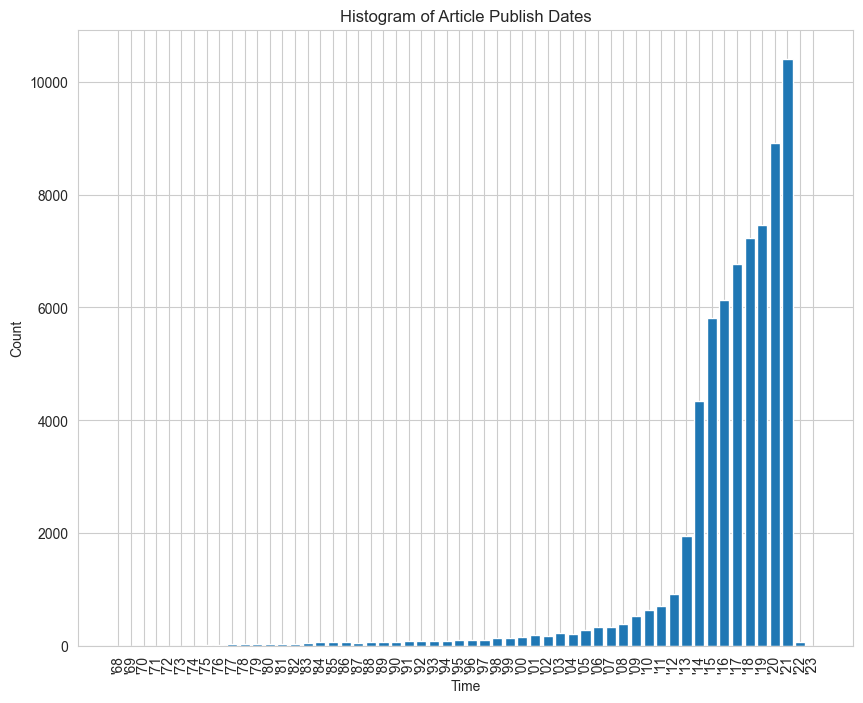

In [37]:
plot_dates_bar(article_dates, 'Histogram of Article Publish Dates', article=True)


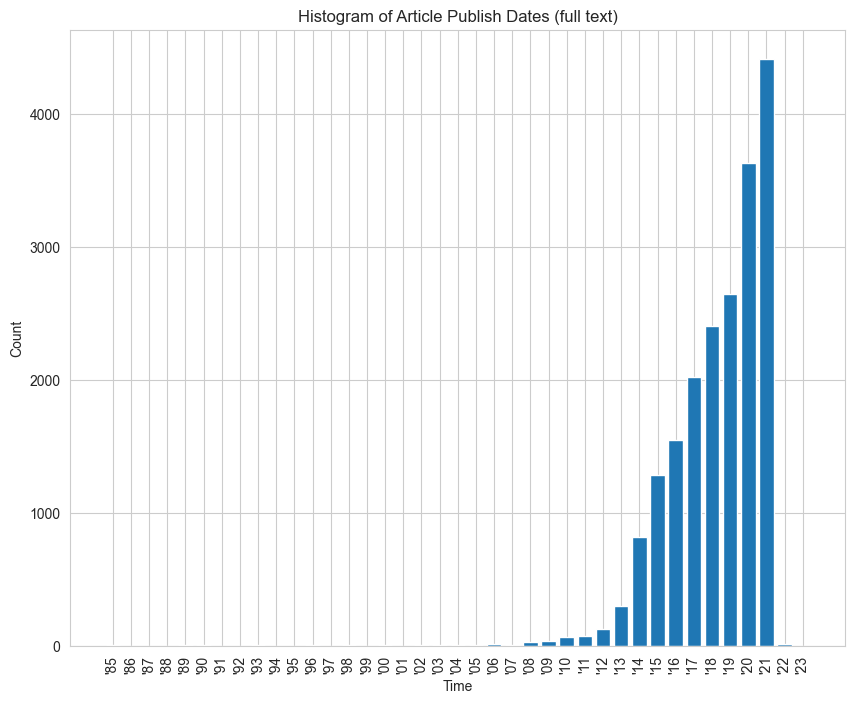

In [45]:
article_dates_fulltext = parse_time_article([m.article.pubdate for m in matches if m.article.fulltext])
plot_dates_bar(article_dates_fulltext, 'Histogram of Article Publish Dates (full text)', article=True)


/var/folders/xp/33m08yl56t1f5z8g9s2h_1j80000gq/T/ipykernel_72844/2837749174.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


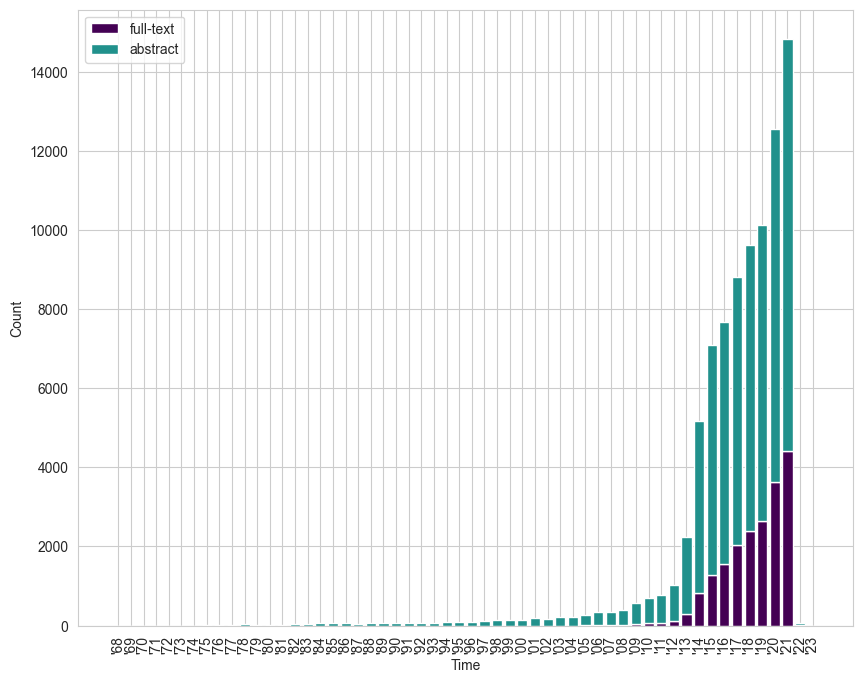

In [59]:
article_dates_fulltext = parse_time_article([m.article.pubdate for m in matches if m.article.fulltext])
article_dates_abstract = parse_time_article([m.article.pubdate for m in matches if not m.article.fulltext])
plot_dates_bar_stacked(article_dates_fulltext, article_dates, 'full-text', 'abstract', None)


## Reports per article


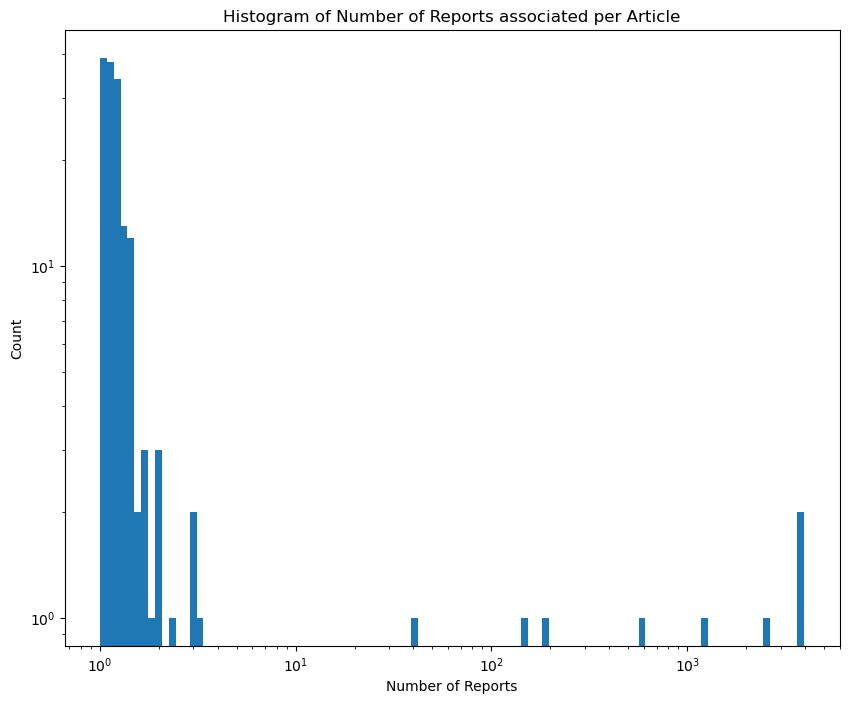

In [ ]:
import numpy as np
from collections import Counter

report_counts = Counter([len(m.reports) for m in matches])
counts, bins = np.histogram(list(report_counts.keys()), bins='auto')
log_bins = np.logspace(np.log10(bins[0]), np.log10(bins[-1]), len(bins))

plt.figure(figsize=(10,8))
plt.bar(log_bins[:-1], counts, width=log_bins[1:] - log_bins[:-1], align='edge')
plt.xscale('log')
plt.yscale('log')
# plt.xticks(log_bins[:-1], [str(int(x)) for x in log_bins[:-1]], rotation=90)
plt.xlabel('Number of Reports')
plt.ylabel('Count')
plt.title('Histogram of Number of Reports associated per Article')
plt.show()

## Lengths (article and full-text)

In [62]:
abstract_lengths = [len(m.article.abstract) for m in matches]
fulltext_lengths = [len(m.article.fulltext) for m in matches if m.article.fulltext]

In [78]:
import matplotlib.ticker as ticker
def plot_length_histogram(lengths, title, fulltext = False):
    lengths = [l for l in lengths if l < 10e4 ]
    counts, bins = np.histogram(lengths, bins=50)
    plt.figure(figsize=(10,8))
    plt.bar(bins[:-1], counts, width=bins[1:] - bins[:-1], align='edge')
    plt.xlabel('Length in characters')


    # plt.yscale('log')
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ylabel('Count')
    plt.title(title)

    # Create a function to format the tick labels with comma separator
    def comma_fmt(x, pos):
        return '{:,.0f}'.format(x)

    # Set the x-axis tick formatter to the comma format function
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(comma_fmt))
    plt.show()

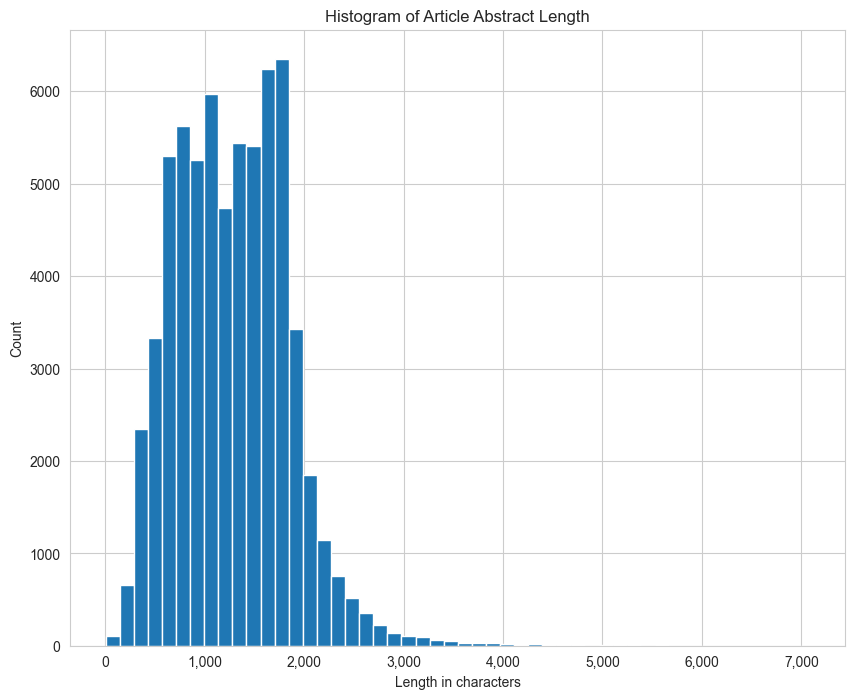

In [79]:
plot_length_histogram(abstract_lengths, 'Histogram of Article Abstract Length')

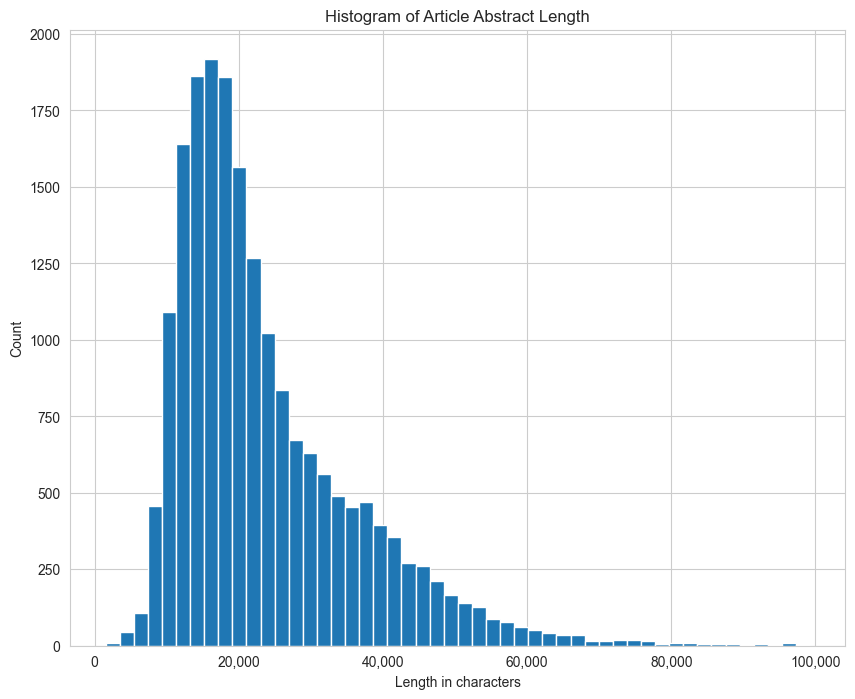

In [80]:
plot_length_histogram(fulltext_lengths, 'Histogram of Article Abstract Length', fulltext=True)

## MeSH terms

In [122]:
import re

def get_mesh(m):
    mesh_terms = m.article.mesh_terms
    if not mesh_terms:
        return []
    # Regex pattern to parse keyword descriptions
    pattern = r"\bD\d+:(.+?)(?=;|$)"

    # Find all matches using the regex pattern
    kw = re.findall(pattern, mesh_terms)

    # Extract the keyword descriptions from the matches
    kw = [match for match in kw]
    return kw

def get_kw(m):
    kw = m.article.keywords
    if not kw:
        return []
    else:
        return kw.split('; ')
    return kw

def get_mesh_or_kw(getter, matches):
    # get all meshes if the paper has them
    meshes = [getter(m) for m in matches]
    meshes = [m for m in meshes if m]
    print(len(meshes))

    # flatten
    meshes = [m.title() for ls in meshes for m in ls]
    print(len(meshes))
    print(len(set(meshes)))

    # count 
    counts = sorted(list(Counter(meshes).items()), key=lambda x: x[1], reverse=True)
    return counts
    
mesh = get_mesh_or_kw(get_mesh, matches)
kw = get_mesh_or_kw(get_kw, matches)

48471
639151
13623
38842
187707
55951


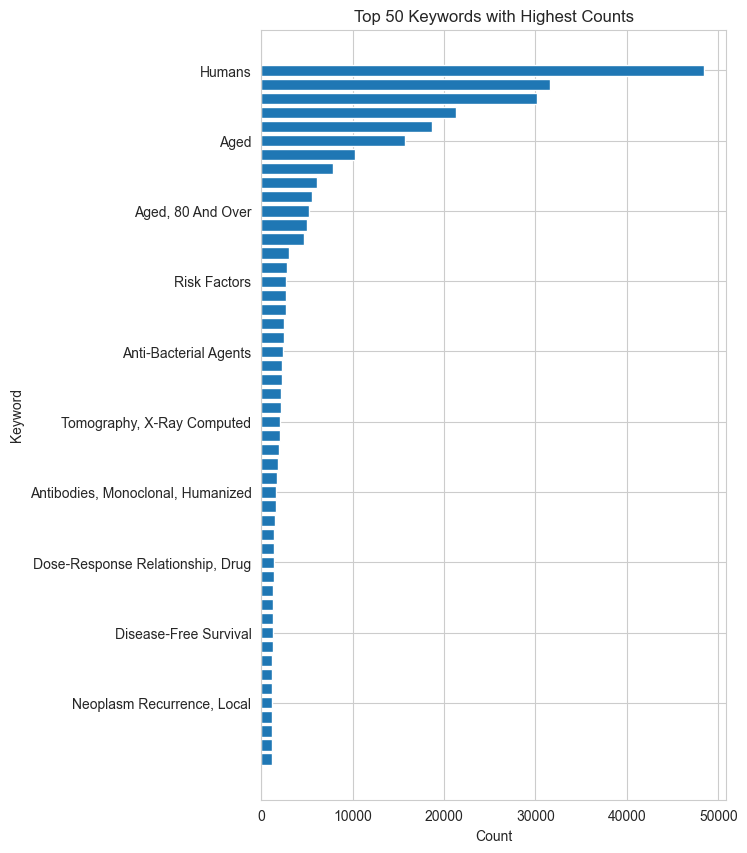

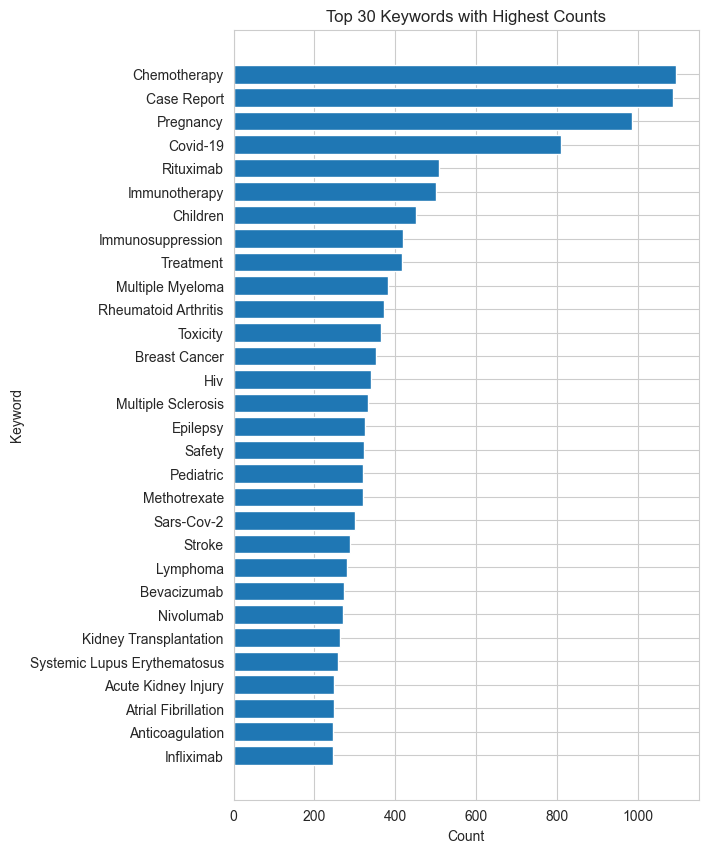

In [124]:
def create_horizontal_barplot(keywords_counts, n=5, i=1):
    """
    Creates a horizontal bar plot of the n keywords with the highest counts.

    Args:
        keywords_counts (list of tuples): List of tuples containing keyword and count information.
        n (int, optional): Number of keywords to plot with highest counts. Defaults to 5.
    """
    # Sort the keywords_counts list by count in descending order
    keywords_counts.sort(key=lambda x: x[1], reverse=True)
    
    # Extract the n keywords and counts
    keywords = [kw[0] for kw in keywords_counts[:n]][::-1]
    counts = [kw[1] for kw in keywords_counts[:n]][::-1]
    
    # Create the horizontal bar plot
    plt.figure(figsize=(6, 10))
    plt.barh(keywords, counts)

    # Show every i-th label on the y-axis
    if i > 1:
        plt.yticks(keywords[::-i])
    
    plt.xlabel('Count')
    plt.ylabel('Keyword')
    plt.title(f'Top {n} Keywords with Highest Counts')
    plt.show()

create_horizontal_barplot(mesh, n=50, i=5)
create_horizontal_barplot(kw, n=30, i=1)

## Sources of reports

In [132]:
# 1 = Physician
# 2 = Pharmacist
# 3 = Other health professional
# 4 = Lawyer
# 5 = Consumer or non-health professional
qualifications = [r.primarysource.qualification for m in matches for r in m.reports if r.primarysource]
print(len(qualifications))
qualifications = Counter(qualifications)
print(qualifications)

256240
Counter({'3': 147665, '1': 94316, '2': 9386, None: 4245, '5': 628})


In [151]:
companies = [r.companynumb for m in matches for r in m.reports if r.companynumb]
print(len(companies))
companies = [c for c in companies if '-' in c and c]
print(len(companies))
companies = [c.split('-')[1] for c in companies]
companies = sorted(Counter(companies).items(), key=lambda x: x[1], reverse=True)
companies

255750
240137


[('MYLANLABS', 25066),
 ('PFIZER INC', 22129),
 ('TEVA', 16983),
 ('SUN PHARMACEUTICAL INDUSTRIES LTD', 11449),
 ('JNJFOC', 9952),
 ('APOTEX', 8356),
 ('ACCORD', 7568),
 ('CIPLA LTD.', 7113),
 ('ALKEM LABORATORIES LIMITED', 6562),
 ('BAUSCH', 5873),
 ('ROCHE', 5445),
 ('BAXTER', 4863),
 ('LUPIN PHARMACEUTICALS INC.', 4526),
 ('STRIDES ARCOLAB LIMITED', 4404),
 ('FRESENIUS KABI', 4064),
 ('DRREDDYS', 3867),
 ('BAYER', 3563),
 ('AMGEN', 3314),
 ('GLAXOSMITHKLINE', 3282),
 ('SA', 3279),
 ('009507513', 2892),
 ('ALVOGEN', 2557),
 ('BRISTOL', 2255),
 ('B.I. PHARMACEUTICALS,INC./RIDGEFIELD', 2250),
 ('ENDO PHARMACEUTICALS INC', 2201),
 ('UCBSA', 2183),
 ('GILEAD', 1975),
 ('WATSON', 1924),
 ('ACTAVIS', 1671),
 ('ALLERGAN', 1628),
 ('ROXANE LABORATORIES, INC.', 1488),
 ('ASTELLAS', 1480),
 ('HIKMA PHARMACEUTICALS USA INC.', 1436),
 ('ABBVIE', 1378),
 ('GLENMARK PHARMACEUTICALS', 1363),
 ('AUROBINDO', 1192),
 ('CELLTRION INC.', 1135),
 ('ZYDUS', 1012),
 ('TAKEDA', 934),
 ('OTSUKA', 925),
 ('ML

## Check distribution of meddra versions

In [ ]:
# check all the meddra verions
versions = []
for m in matches:
    for report in m.reports:
        for reaction in report.patient.reaction:
            versions.append(reaction.reactionmeddraversionpt)

sorted_dict = dict(sorted(Counter(versions).items(), key=lambda x: x[1], reverse=True))

for key, value in sorted_dict.items():
    print(key, value)